In [1]:
#import dependencies

import pandas as pd

import numpy as np

import matplotlib.pyplot as plt


In [2]:
#create a set of random latitude and longtitude combinations 

lats = np.random.uniform(low=-90.000, high=90.000, size=1500)

lngs = np.random.uniform(low=-180.000, high=180.0060, size=1500)

lat_lngs = zip(lats,lngs)

lat_lngs

In [3]:
#add the latitudes and longtitudes into a list 

coordinates = list(lat_lngs)

In [4]:
#use the print function to display the lat and long combinations 

for coordinate in coordinates:
    
    print(coordinate[0], coordinate[1])

29.473354123063615 -90.15462086791612
63.56055182955319 -15.341032895829073
53.24032039568013 -127.67083464418019
73.74632417851069 73.20904499046466
-79.38719892342445 145.57008800538114
-67.49891600941444 -3.7187248956500127
59.49432077620645 158.80425695138865
67.40214494117103 -7.7220068315281765
-16.990988014045286 109.37249490990223
32.42370012087005 108.02289739249977
83.55782585570839 -94.74440715928777
-10.419758481551014 -16.359874136254604
-81.95020487909707 -157.01541836158864
-69.35310318956768 -123.28097085957191
60.68229369386947 94.60065766992813
-16.417418967469132 52.1292352490471
-58.42751168721729 7.139059818590113
66.64421530467871 68.17873517749774
-29.360130661614946 -163.77460447797236
88.19479343501641 -121.33715933782015
89.94026548332863 70.71361247976807
60.94340874527046 93.72933314396971
-76.81181001111679 -114.91577679401533
22.922357794576314 124.3987068927787
1.2116626136054407 113.08276565378316
-37.343072372884585 -76.74230868589632
-89.69127704510079

-19.354765637623075 22.014486694386335
72.35743047008307 140.6410209503536
82.3968337614541 -167.7539757392589
-23.067863895118464 17.924706358924368
15.454562127278933 -93.38399882055481
-33.07508491140616 -75.17527244508506
-30.319966358791355 102.37308116979585
57.30206298820724 -55.12889504967234
0.45396443759138094 -48.14924160446168
-21.910832989821472 -123.17851670211323
-67.83349215833294 -23.40532045598613
-42.85913069117952 151.15063918383277
50.46388808809169 -127.98857510767431
20.481966480799528 146.20171109080098
-28.1269700116598 -155.91050998066936
27.248721099590952 -133.1360301745288
-82.68217772243909 -136.12863200996009
-29.67732836455498 -163.6095994745984
-24.639755042017697 -105.92191932193913
89.64554876530687 -120.53647772847378
-27.960202139888622 163.98295238808555
69.43354592735508 30.87571495593363
-63.90049797751882 -42.462975475054975
39.40250209619606 42.36845461997939
-47.40133537616362 100.78487183775115
2.977920586566242 9.109158507756916
15.280580418

In [5]:
#import citipy
from citipy import citipy

In [6]:
#write loop to identify nearest cities to coordinates 

#create emtpy list to hold values 

cities = []

for coordinate in coordinates: 
    
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name
    
    #If name is unique then add it to list 
    
    if city not in cities:
        cities.append(city)
        
    #print the city count to confirm deseried amount 

len(cities)

618

In [7]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [8]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=30885e2d63142e26bc7e1e3b33d807de


In [9]:
#import date time and time module from library 

from datetime import datetime 

import time

In [10]:
#create empty list to hold weather data 

city_data = []

#print the beginning of the logging 

print("Beggining Data Retrieval       ")

print("-------------------------------")

#create counters 

record_count = 1

set_count = 1

#loop throug all the cities in our list 

for i, city in enumerate(cities):
    
    #group cities in sets of 50 for logging purposes. 
    
    if(i %50 == 0 and i >= 50):
        
        set_count += 1 
        
        record_count += 1 
        
        time.sleep(60)
            
        #create endpoint URL with each city 
        
    city_url = url + "&q=" + city.replace(" ","+")
        
        #log the URL, record, and set the numbers and the city. 
        
    print(f"Processing Record {record_count} of set {set_count} {city}")
        
        #add 1 to record count 
        
    record_count += 1
        
        # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beggining Data Retrieval       
-------------------------------
Processing Record 1 of set 1 estelle
Processing Record 2 of set 1 hofn
Processing Record 3 of set 1 kitimat
Processing Record 4 of set 1 yar-sale
Processing Record 5 of set 1 hobart
Processing Record 6 of set 1 cape town
Processing Record 7 of set 1 palana
Processing Record 8 of set 1 vestmanna
Processing Record 9 of set 1 karratha
Processing Record 10 of set 1 ankang
Processing Record 11 of set 1 qaanaaq
Processing Record 12 of set 1 georgetown
Processing Record 13 of set 1 mataura
Processing Record 14 of set 1 rikitea
Processing Record 15 of set 1 severo-yeniseyskiy
Processing Record 16 of set 1 ambodifototra
City not found. Skipping...
Processing Record 17 of set 1 hermanus
Processing Record 18 of set 1 aksarka
Processing Record 19 of set 1 avarua
Processing Record 20 of set 1 tuktoyaktuk
Processing Record 21 of set 1 dikson
Processing Record 22 of set 1 punta arenas
Processing Record 23 of set 1 ishigaki
Processing Rec

Processing Record 197 of set 4 kodiak
Processing Record 198 of set 4 belushya guba
City not found. Skipping...
Processing Record 199 of set 4 lolua
City not found. Skipping...
Processing Record 200 of set 4 bull savanna
Processing Record 201 of set 4 butaritari
Processing Record 202 of set 4 ust-nera
Processing Record 203 of set 4 carnarvon
Processing Record 205 of set 5 provideniya
Processing Record 206 of set 5 la ronge
Processing Record 207 of set 5 ndele
Processing Record 208 of set 5 cockburn town
Processing Record 209 of set 5 bose
Processing Record 210 of set 5 dawlatabad
Processing Record 211 of set 5 poum
Processing Record 212 of set 5 porto novo
Processing Record 213 of set 5 santa cruz do rio pardo
Processing Record 214 of set 5 nizhneyansk
City not found. Skipping...
Processing Record 215 of set 5 berlevag
Processing Record 216 of set 5 kumluca
Processing Record 217 of set 5 taunsa
Processing Record 218 of set 5 barentsburg
City not found. Skipping...
Processing Record 219 

Processing Record 389 of set 8 tokmak
Processing Record 390 of set 8 severodvinsk
Processing Record 391 of set 8 tharad
Processing Record 392 of set 8 madimba
Processing Record 393 of set 8 makakilo city
Processing Record 394 of set 8 waitati
Processing Record 395 of set 8 manado
Processing Record 396 of set 8 tuy hoa
Processing Record 397 of set 8 bilma
Processing Record 398 of set 8 hasaki
Processing Record 399 of set 8 naze
Processing Record 400 of set 8 paita
Processing Record 401 of set 8 amasya
Processing Record 402 of set 8 spirit river
Processing Record 403 of set 8 catamarca
Processing Record 404 of set 8 banjarmasin
Processing Record 405 of set 8 severnyy
Processing Record 406 of set 8 mancio lima
Processing Record 407 of set 8 seymchan
Processing Record 409 of set 9 liapades
City not found. Skipping...
Processing Record 410 of set 9 mackay
Processing Record 411 of set 9 kodinsk
Processing Record 412 of set 9 pangody
Processing Record 413 of set 9 the valley
Processing Record

Processing Record 583 of set 12 vatutine
Processing Record 584 of set 12 nemuro
Processing Record 585 of set 12 lalsk
Processing Record 586 of set 12 kisangani
Processing Record 587 of set 12 ixtapa
Processing Record 588 of set 12 tubuala
Processing Record 589 of set 12 richards bay
Processing Record 590 of set 12 glenwood springs
Processing Record 591 of set 12 hervey bay
Processing Record 592 of set 12 muzhi
Processing Record 593 of set 12 meulaboh
Processing Record 594 of set 12 sesimbra
Processing Record 595 of set 12 luwingu
Processing Record 596 of set 12 andros town
Processing Record 597 of set 12 sheridan
Processing Record 598 of set 12 maldonado
Processing Record 599 of set 12 luoyang
Processing Record 600 of set 12 iqaluit
Processing Record 601 of set 12 fort nelson
Processing Record 602 of set 12 suntar
Processing Record 603 of set 12 parakai
Processing Record 604 of set 12 avon park
Processing Record 605 of set 12 puerto penasco
Processing Record 606 of set 12 tukums
Proces

In [11]:
#convert the array of dictionaries to Pandas data frame.

city_data_df = pd.DataFrame(city_data)

city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Estelle,29.8458,-90.1067,84.99,69,75,3.44,US,2022-09-06 23:03:22
1,Hofn,64.2539,-15.2082,51.53,85,4,10.98,IS,2022-09-06 23:03:22
2,Kitimat,54.0524,-128.6534,55.90,25,100,1.61,CA,2022-09-06 23:00:06
3,Yar-Sale,66.8333,70.8333,35.49,87,100,6.13,RU,2022-09-06 23:03:22
4,Hobart,-42.8794,147.3294,47.26,88,20,8.05,AU,2022-09-06 22:58:59
5,Cape Town,-33.9258,18.4232,54.91,70,0,1.01,ZA,2022-09-06 23:03:23
6,Palana,59.1167,159.9667,48.47,47,9,4.12,RU,2022-09-06 23:03:23
7,Vestmanna,62.1564,-7.1664,56.32,88,100,10.36,FO,2022-09-06 23:03:24
8,Karratha,-20.7377,116.8463,64.13,47,0,10.54,AU,2022-09-06 23:03:24
9,Ankang,32.6800,109.0172,70.11,61,98,1.41,CN,2022-09-06 23:03:24


In [12]:
#reorder colums 

new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]

city_data_df = city_data_df[new_column_order]

In [13]:
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Estelle,US,2022-09-06 23:03:22,29.8458,-90.1067,84.99,69,75,3.44
1,Hofn,IS,2022-09-06 23:03:22,64.2539,-15.2082,51.53,85,4,10.98
2,Kitimat,CA,2022-09-06 23:00:06,54.0524,-128.6534,55.90,25,100,1.61
3,Yar-Sale,RU,2022-09-06 23:03:22,66.8333,70.8333,35.49,87,100,6.13
4,Hobart,AU,2022-09-06 22:58:59,-42.8794,147.3294,47.26,88,20,8.05
5,Cape Town,ZA,2022-09-06 23:03:23,-33.9258,18.4232,54.91,70,0,1.01
6,Palana,RU,2022-09-06 23:03:23,59.1167,159.9667,48.47,47,9,4.12
7,Vestmanna,FO,2022-09-06 23:03:24,62.1564,-7.1664,56.32,88,100,10.36
8,Karratha,AU,2022-09-06 23:03:24,-20.7377,116.8463,64.13,47,0,10.54
9,Ankang,CN,2022-09-06 23:03:24,32.6800,109.0172,70.11,61,98,1.41


In [14]:
#create the output file (CSV)

output_data_file = "weather_data/cities.csv"

#export the city_data into a csv

city_data_df.to_csv(output_data_file, index_label="City_ID")



In [15]:
#create scatter plot for city lat vs max temperature 

lats = city_data_df["Lat"]

max_temps = city_data_df["Max Temp"]

humidity = city_data_df["Humidity"]

cloudiness = city_data_df["Cloudiness"]

wind_speed = city_data_df["Wind Speed"]


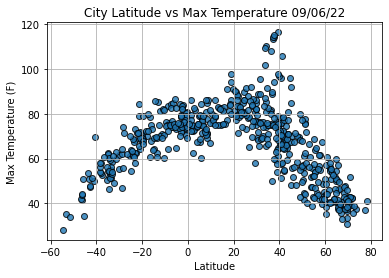

In [16]:
#import the time module 

import time 

#get todays date in seconds 

today = time.time()

#build the scatter plot for the lat vs max temp

plt.scatter(lats,
           max_temps,
           edgecolor="black", linewidths=1, marker="o",
           alpha=0.8, label="Cities")

#incorporate other graph properties

plt.title(f"City Latitude vs Max Temperature " + time.strftime("%x"))

plt.ylabel("Max Temperature (F)")
          
plt.xlabel("Latitude")
          
plt.grid(True)
          
plt.savefig("weather_data/Fig1.png")
          
#show plot 

plt.show()

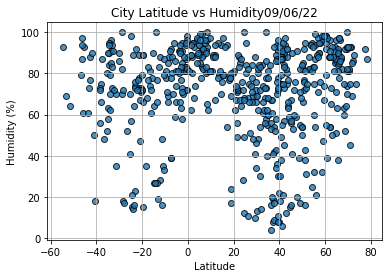

In [17]:
today = time.time()

#build the scatter plot for the lat vs max temp

plt.scatter(lats,
           humidity,
           edgecolor="black", linewidths=1, marker="o",
           alpha=0.8, label="Cities")

#incorporate other graph properties

plt.title(f"City Latitude vs Humidity" + time.strftime("%x"))

plt.ylabel("Humidity (%)")
          
plt.xlabel("Latitude")
          
plt.grid(True)
          
plt.savefig("weather_data/Fig2.png")
          
#show plot 

plt.show()

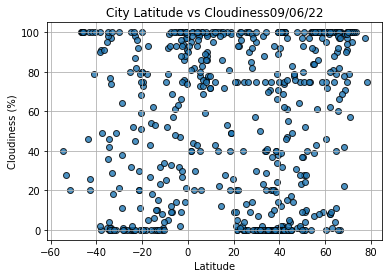

In [18]:
#build the scatter plot for the lat vs max temp

plt.scatter(lats,
           cloudiness,
           edgecolor="black", linewidths=1, marker="o",
           alpha=0.8, label="Cities")

#incorporate other graph properties

plt.title(f"City Latitude vs Cloudiness" + time.strftime("%x"))

plt.ylabel("Cloudiness (%)")
          
plt.xlabel("Latitude")
          
plt.grid(True)
          
plt.savefig("weather_data/Fig3.png")
          
#show plot 

plt.show()

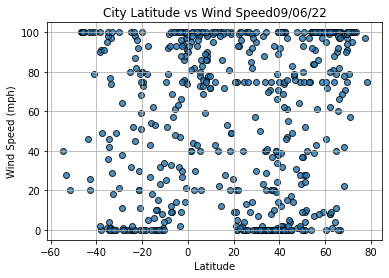

In [19]:
plt.scatter(lats,
           cloudiness,
           edgecolor="black", linewidths=1, marker="o",
           alpha=0.8, label="Cities")

#incorporate other graph properties

plt.title(f"City Latitude vs Wind Speed" + time.strftime("%x"))

plt.ylabel("Wind Speed (mph)")
          
plt.xlabel("Latitude")
          
plt.grid(True)
          
plt.savefig("weather_data/Fig4.png")
          
#show plot 

plt.show()

In [31]:
# Create a function to create perform linear regression on the weather data


from scipy.stats import linregress 

# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    
    # Get the equation of the line.
    
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [32]:
#create new data frame for northern and southern hempispheres 

index13 = city_data_df.loc[13]

index13

City                      Rikitea
Country                        PF
Date          2022-09-06 23:03:26
Lat                      -23.1203
Lng                     -134.9692
Max Temp                     73.2
Humidity                       74
Cloudiness                     87
Wind Speed                  23.26
Name: 13, dtype: object

In [33]:
#create new data frame for northern and southern hempispheres 


#city_data_df.loc[(city_data_df["Lat"] >= 0)]

northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]

southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]



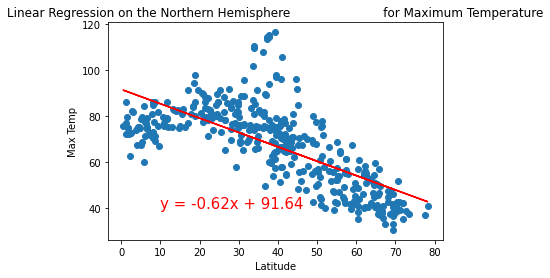

In [36]:
#linear regression on nothern hemi 

x_values = northern_hemi_df["Lat"]

y_values = northern_hemi_df["Max Temp"]

#call the function 

plot_linear_regression(x_values, y_values,
                       "Linear Regression on the Northern Hemisphere \
                       for Maximum Temperature" , "Max Temp", (10,40))

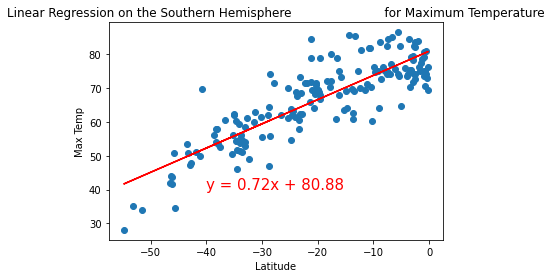

In [39]:
#linear regression on southern hemi 

x_values = southern_hemi_df["Lat"]

y_values = southern_hemi_df["Max Temp"]

#call the function 

plot_linear_regression(x_values, y_values,
                       "Linear Regression on the Southern Hemisphere \
                       for Maximum Temperature" , "Max Temp", (-40,40))

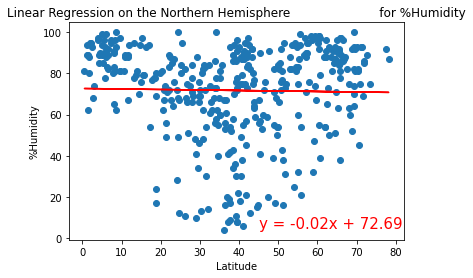

In [44]:
#linear regression on the northern hemi 

x_values = northern_hemi_df["Lat"]

y_values = northern_hemi_df["Humidity"]

#call the function.

plot_linear_regression(x_values, y_values,
                      
                      'Linear Regression on the Northern Hemisphere \
                      for %Humidity', '%Humidity', (45,5))

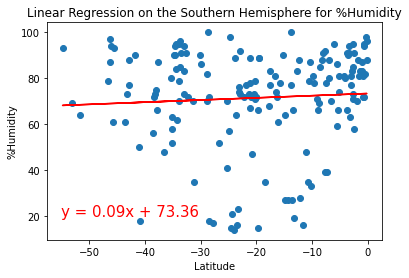

In [50]:
#linear regression on the southern hemi 

x_values = southern_hemi_df["Lat"]

y_values = southern_hemi_df["Humidity"]

#call the function.

plot_linear_regression(x_values, y_values,
                      
                      'Linear Regression on the Southern Hemisphere for %Humidity', '%Humidity', (-55,20))

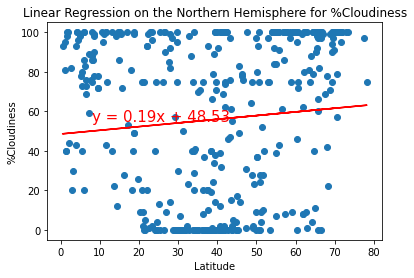

In [54]:
#linear regression on the northern hemi 

x_values = northern_hemi_df["Lat"]

y_values = northern_hemi_df["Cloudiness"]

#call the function.

plot_linear_regression(x_values, y_values,
                      
                      'Linear Regression on the Northern Hemisphere for %Cloudiness', '%Cloudiness', (8,55))

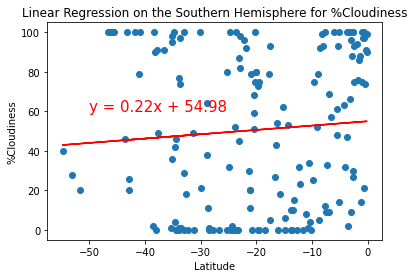

In [56]:
#linear regression on the southern hemi 

x_values = southern_hemi_df["Lat"]

y_values = southern_hemi_df["Cloudiness"]

#call the function.

plot_linear_regression(x_values, y_values,
                      
                      'Linear Regression on the Southern Hemisphere for %Cloudiness', '%Cloudiness', (-50,60))

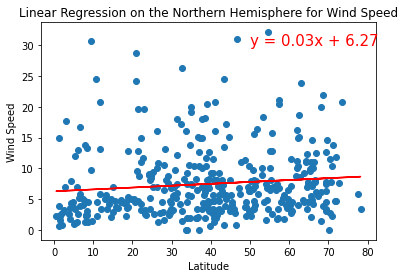

In [59]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]


y_values = northern_hemi_df["Wind Speed"]

# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for Wind Speed', 'Wind Speed',(50,30))

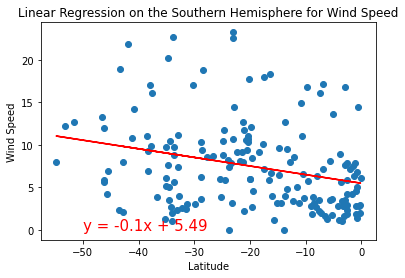

In [61]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]

y_values = southern_hemi_df["Wind Speed"]

# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for Wind Speed', 'Wind Speed',(-50,0))